# **Prediction Using Un-Supervised Machine Learning**

> Add blockquote



> Author Aqsa Rasheed

## **Beginner Level**
 predict the optimum numbers of clusters
Iris Dataset Link:https://bit.ly/3kXTdox





Dataset Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from the Colab root directory
data = pd.read_csv('/content/sample_data/Iris.csv')

print("Successfully Imported")




Successfully Imported


Dataset Visualization

In [ ]:
# Display the first 10 rows of the dataset
print(data.head(10))

# Display basic information about the dataset
print(data.info())
print(data.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  

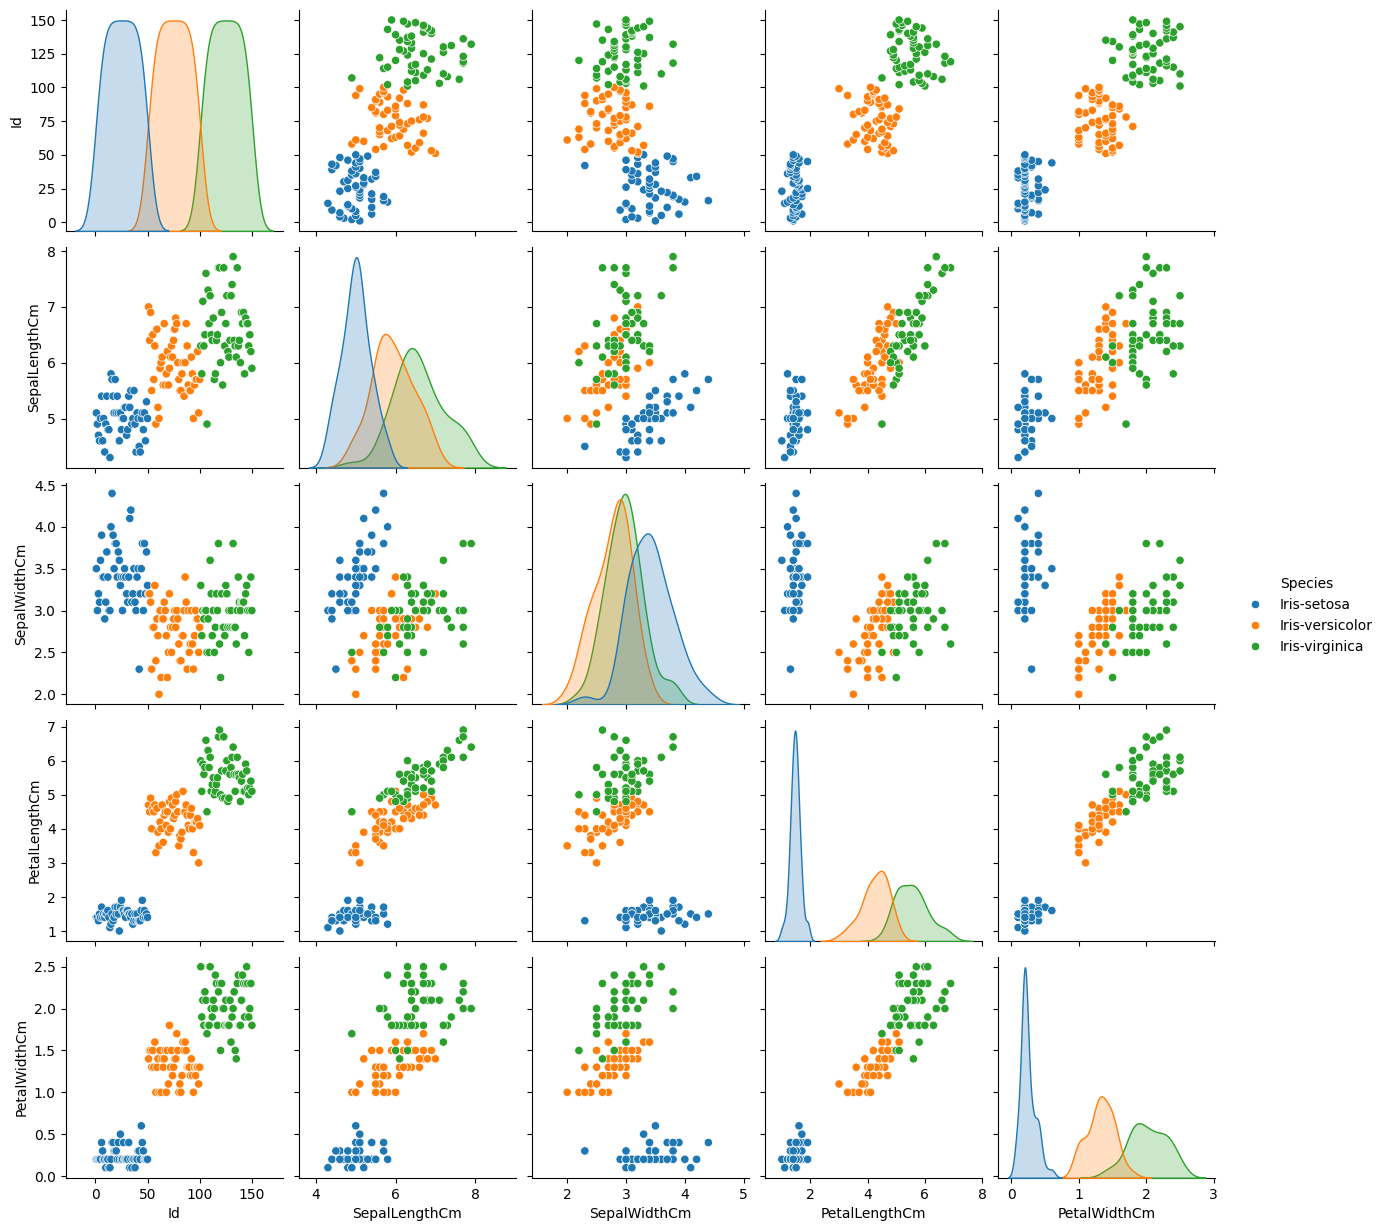

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(data, hue='Species')
plt.show()


Elbow Method for Optimal Clustering

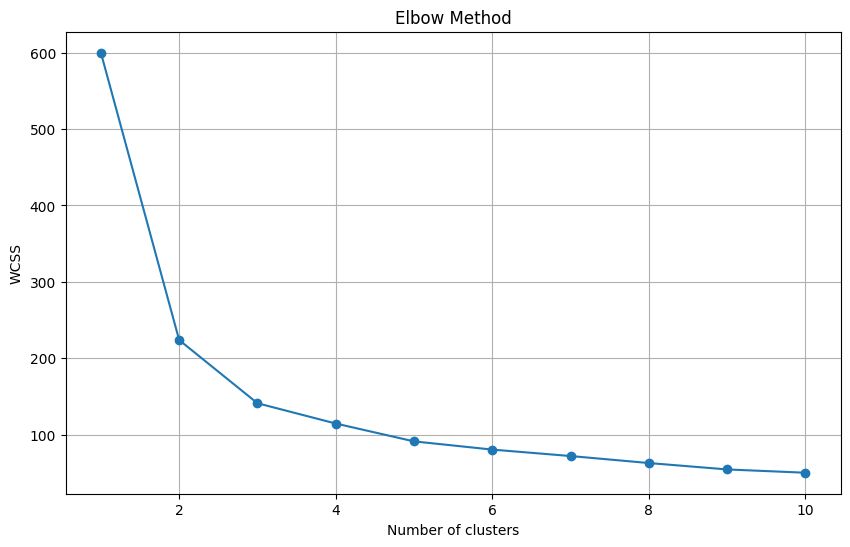

In [ ]:
# Prepare the data (excluding the 'Id' and 'Species' columns)
X = data.drop(['Id', 'Species'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


K mean clustering

In [ ]:
# From the elbow plot, let's assume the optimum number of clusters is 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster predictions to the original dataframe
data['Cluster'] = y_kmeans

# Show the first few rows of the new dataframe
print(data.head(100))


     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     1            5.1           3.5            1.4           0.2   
1     2            4.9           3.0            1.4           0.2   
2     3            4.7           3.2            1.3           0.2   
3     4            4.6           3.1            1.5           0.2   
4     5            5.0           3.6            1.4           0.2   
..  ...            ...           ...            ...           ...   
95   96            5.7           3.0            4.2           1.2   
96   97            5.7           2.9            4.2           1.3   
97   98            6.2           2.9            4.3           1.3   
98   99            5.1           2.5            3.0           1.1   
99  100            5.7           2.8            4.1           1.3   

            Species  Cluster  
0       Iris-setosa        1  
1       Iris-setosa        1  
2       Iris-setosa        1  
3       Iris-setosa        1  
4       Iris-set

Cluster Visualization

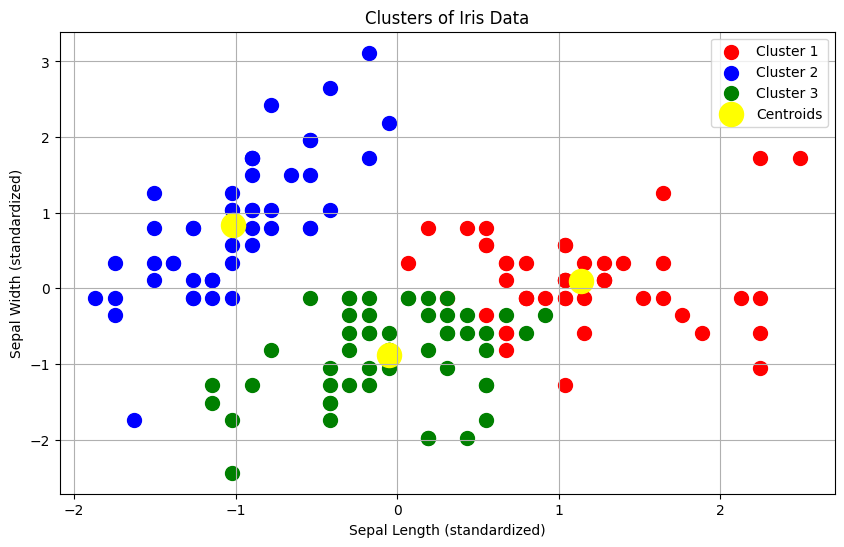

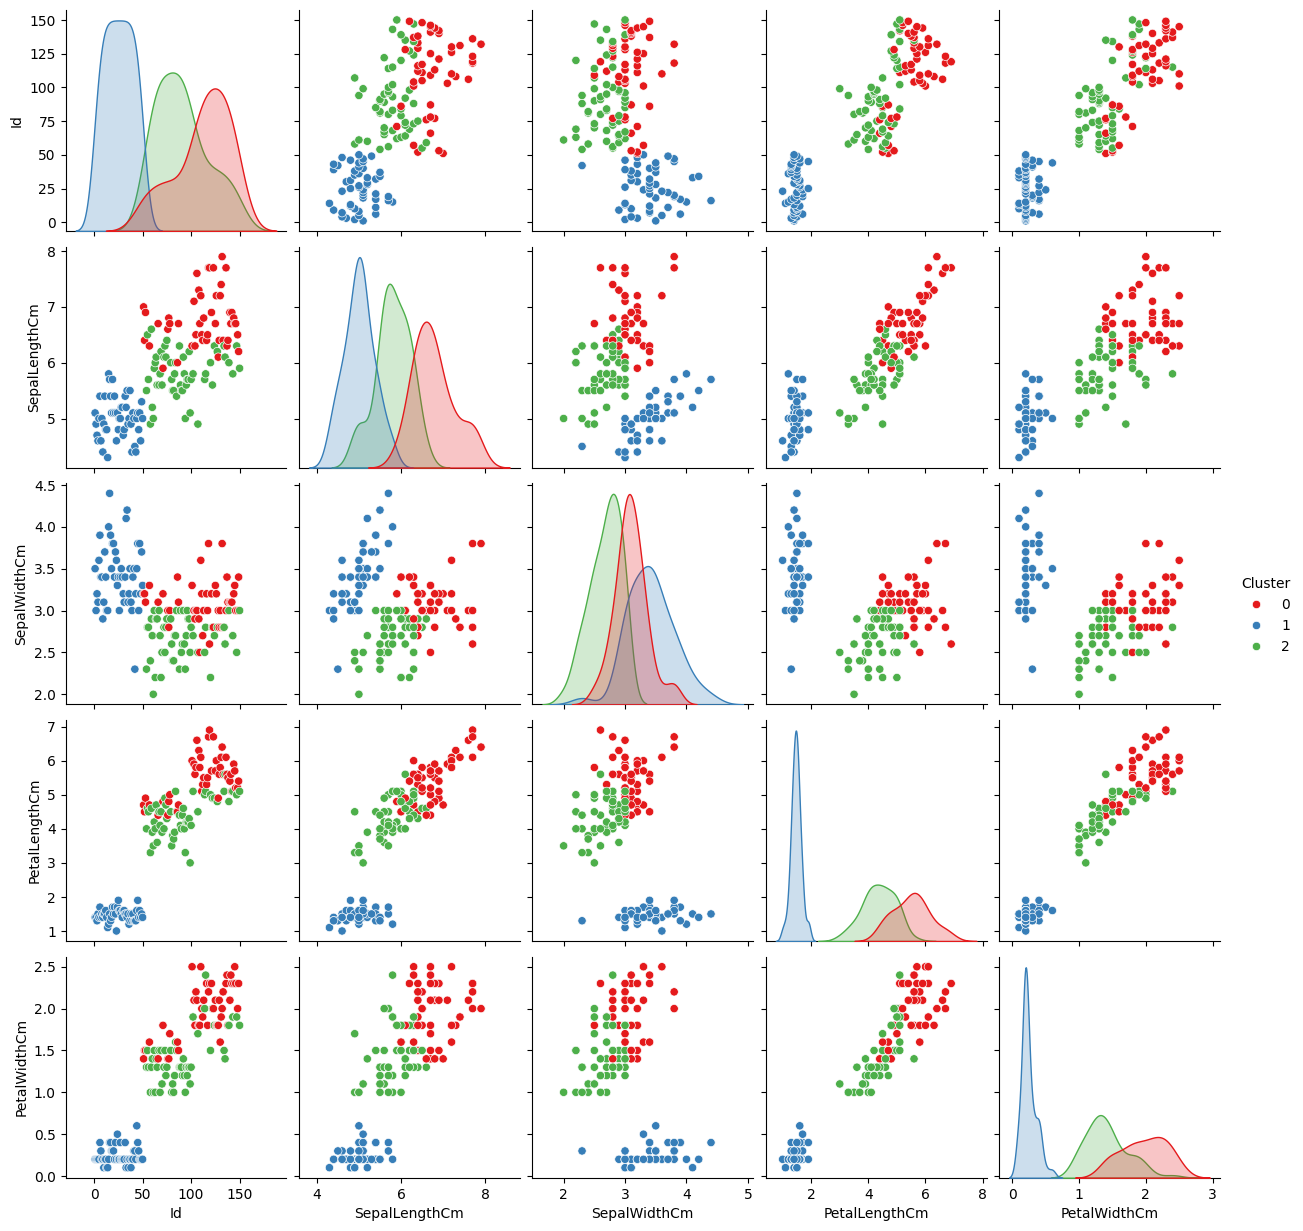

In [ ]:
# Visualizing the clusters in a 2D plot using the first two features
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.legend()
plt.grid(True)
plt.show()

# Pairplot to visualize clusters with respect to the original features
sns.pairplot(data, hue='Cluster', palette='Set1')
plt.show()
